# Exploratory Data Analysis (EDA) of the H&M dataset
## Setup
Setup the environment, import the necessary libraries and datasets.

In [2]:
#imports
import pandas as pd
import matplotlib
# directory of the dataset
data_dir = '..\\..\\Input\\Dataset\\'

# import articles.csv into a pandas dataframe, reading ids as strings
print("Importing articles dataset...")
articles = pd.read_csv(data_dir + 'articles.csv', dtype={'article_id': str})
print("\tDone")
# import customers.csv into a pandas dataframe
print("Importing customers dataset...")
customers = pd.read_csv(data_dir + 'customers.csv')
print("\tDone")
# import transactions_train.csv into a pandas dataframe
print("Importing transactions_train dataset...")
transactions_train = pd.read_csv(data_dir + 'transactions_train.csv', dtype={'article_id': str})
print("\tDone")

Importing articles dataset...
	Done
Importing customers dataset...
	Done
Importing transactions_train dataset...
	Done


## Articles
We will start by exploring the articles dataset

In [11]:
# number of unique article ids
num_unq_article_ids = len(articles['article_id'].unique())
# number of articles
num_articles = len(articles)
# number of articles with an id length not equal to 10 characters
num_articles_not_10 = len(articles[articles['article_id'].str.len() != 10])

# print results
print(f'Number of unique article ids: {num_unq_article_ids} \nNumber of articles: {num_articles}')
print(f'Number of articles with an id length not equal to 10: {num_articles_not_10}')

Number of unique article ids: 105542 
Number of articles: 105542
Number of articles with an id length not equal to 10: 0


As we can see, the number of unique article ids is equal to the number of articles. This means that there are no duplicates in the article_id column. And they all have a length of 10 characters.

Number of articles without a colour_group_name: 0
Number of articles where the colour_group_name is 'Unknown': 28
Number of articles where the colour_group_name is 'Undefined': 0


<Axes: title={'center': 'Distribution of the colour_group_name column'}, xlabel='colour_group_name'>

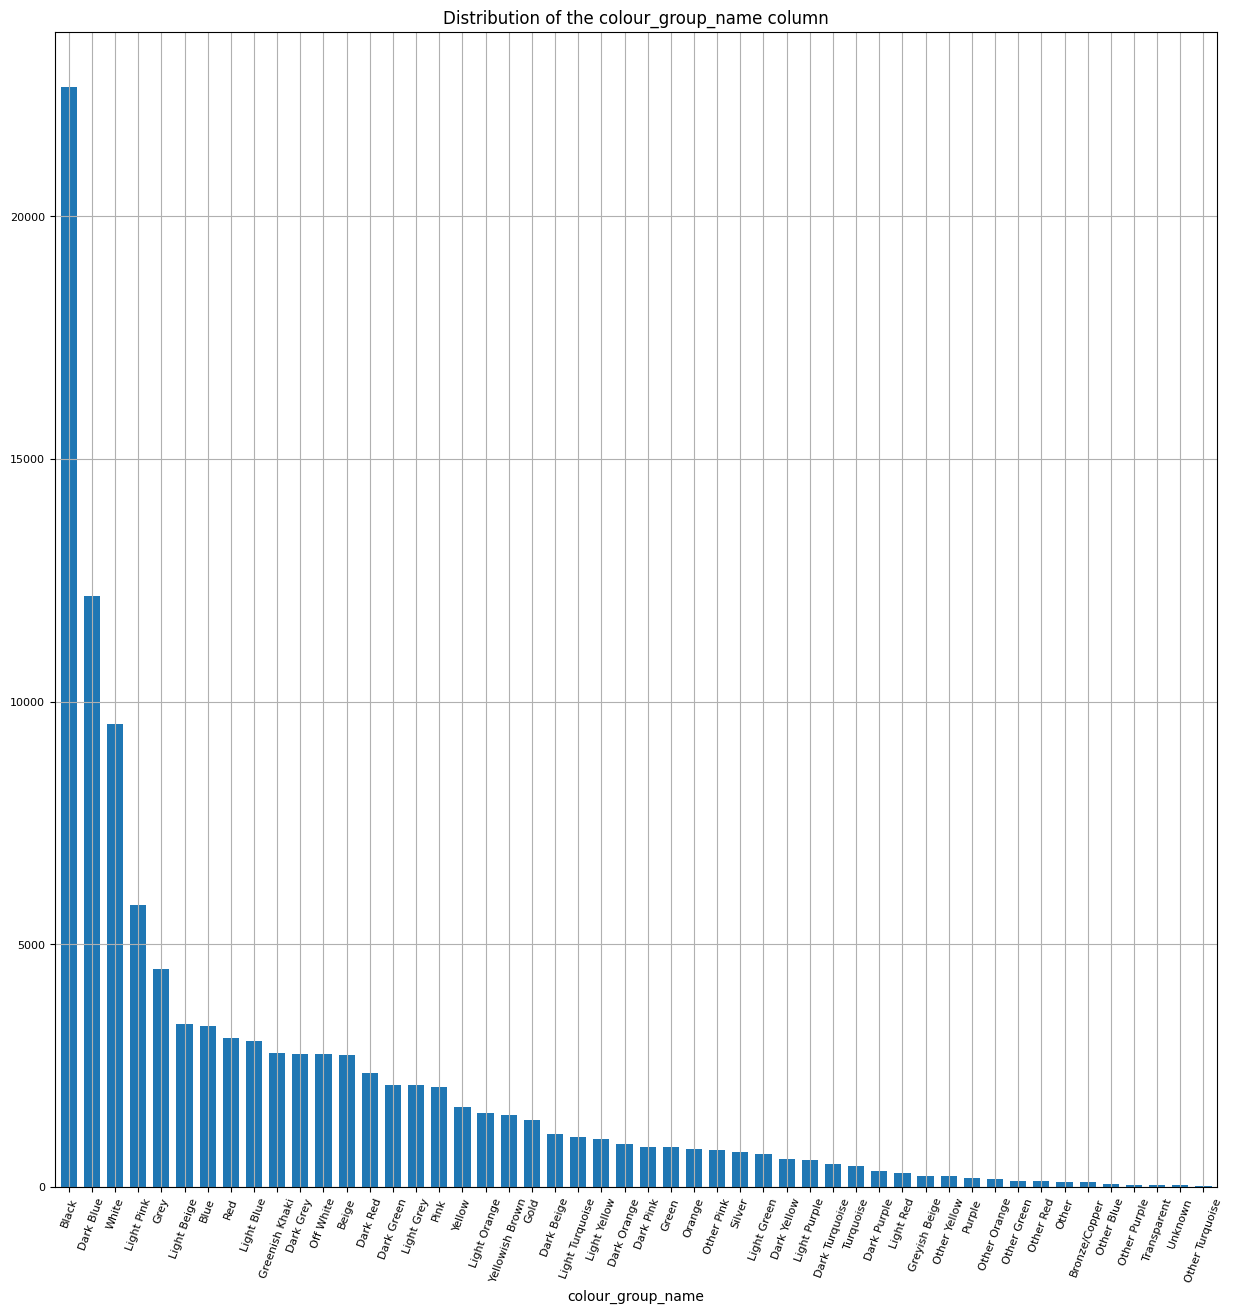

In [12]:
# Number of articles without a colour_group_name, where the colour_group_name is 'Unknown' without considering capitalization or where the colour_group_name is 'Undefined' without considering capitalization
num_articles_no_colour_group_name = len(articles[articles['colour_group_name'].isnull()])
num_articles_colour_group_name_unknown = len(articles[articles['colour_group_name'].str.lower() == 'unknown'])
num_articles_colour_group_name_undefined = len(articles[articles['colour_group_name'].str.lower() == 'undefined'])
# print results
print(f'Number of articles without a colour_group_name: {num_articles_no_colour_group_name}')
print(f'Number of articles where the colour_group_name is \'Unknown\': {num_articles_colour_group_name_unknown}')
print(f'Number of articles where the colour_group_name is \'Undefined\': {num_articles_colour_group_name_undefined}')
# Plot the distribution of the colour_group_name column in percentages, a title, a grid, a rotation of the labels and a bigger font size, increased spacing between the bars and labels
articles['colour_group_name'].value_counts().plot(kind='bar', figsize=(15,15), title='Distribution of the colour_group_name column', fontsize = 8, rot = 70, grid = True, width = 0.7)

In this snippet, we see that each article has a colour_group_name. However, there are some articles where the colour_group_name is 'Unknown' or 'Undefined'.
In the plot we see that the most common colour_group_name is 'Black' followed by 'Blue' and 'Grey'.
We will now explore the colour_master_name column.

Number of articles without a perceived_colour_master_name: 0
Number of articles where the perceived_colour_master_name is 'Unknown': 685
Number of articles where the perceived_colour_master_name is 'Undefined': 105


<Axes: title={'center': 'Distribution of the perceived_colour_master_name column'}, ylabel='proportion'>

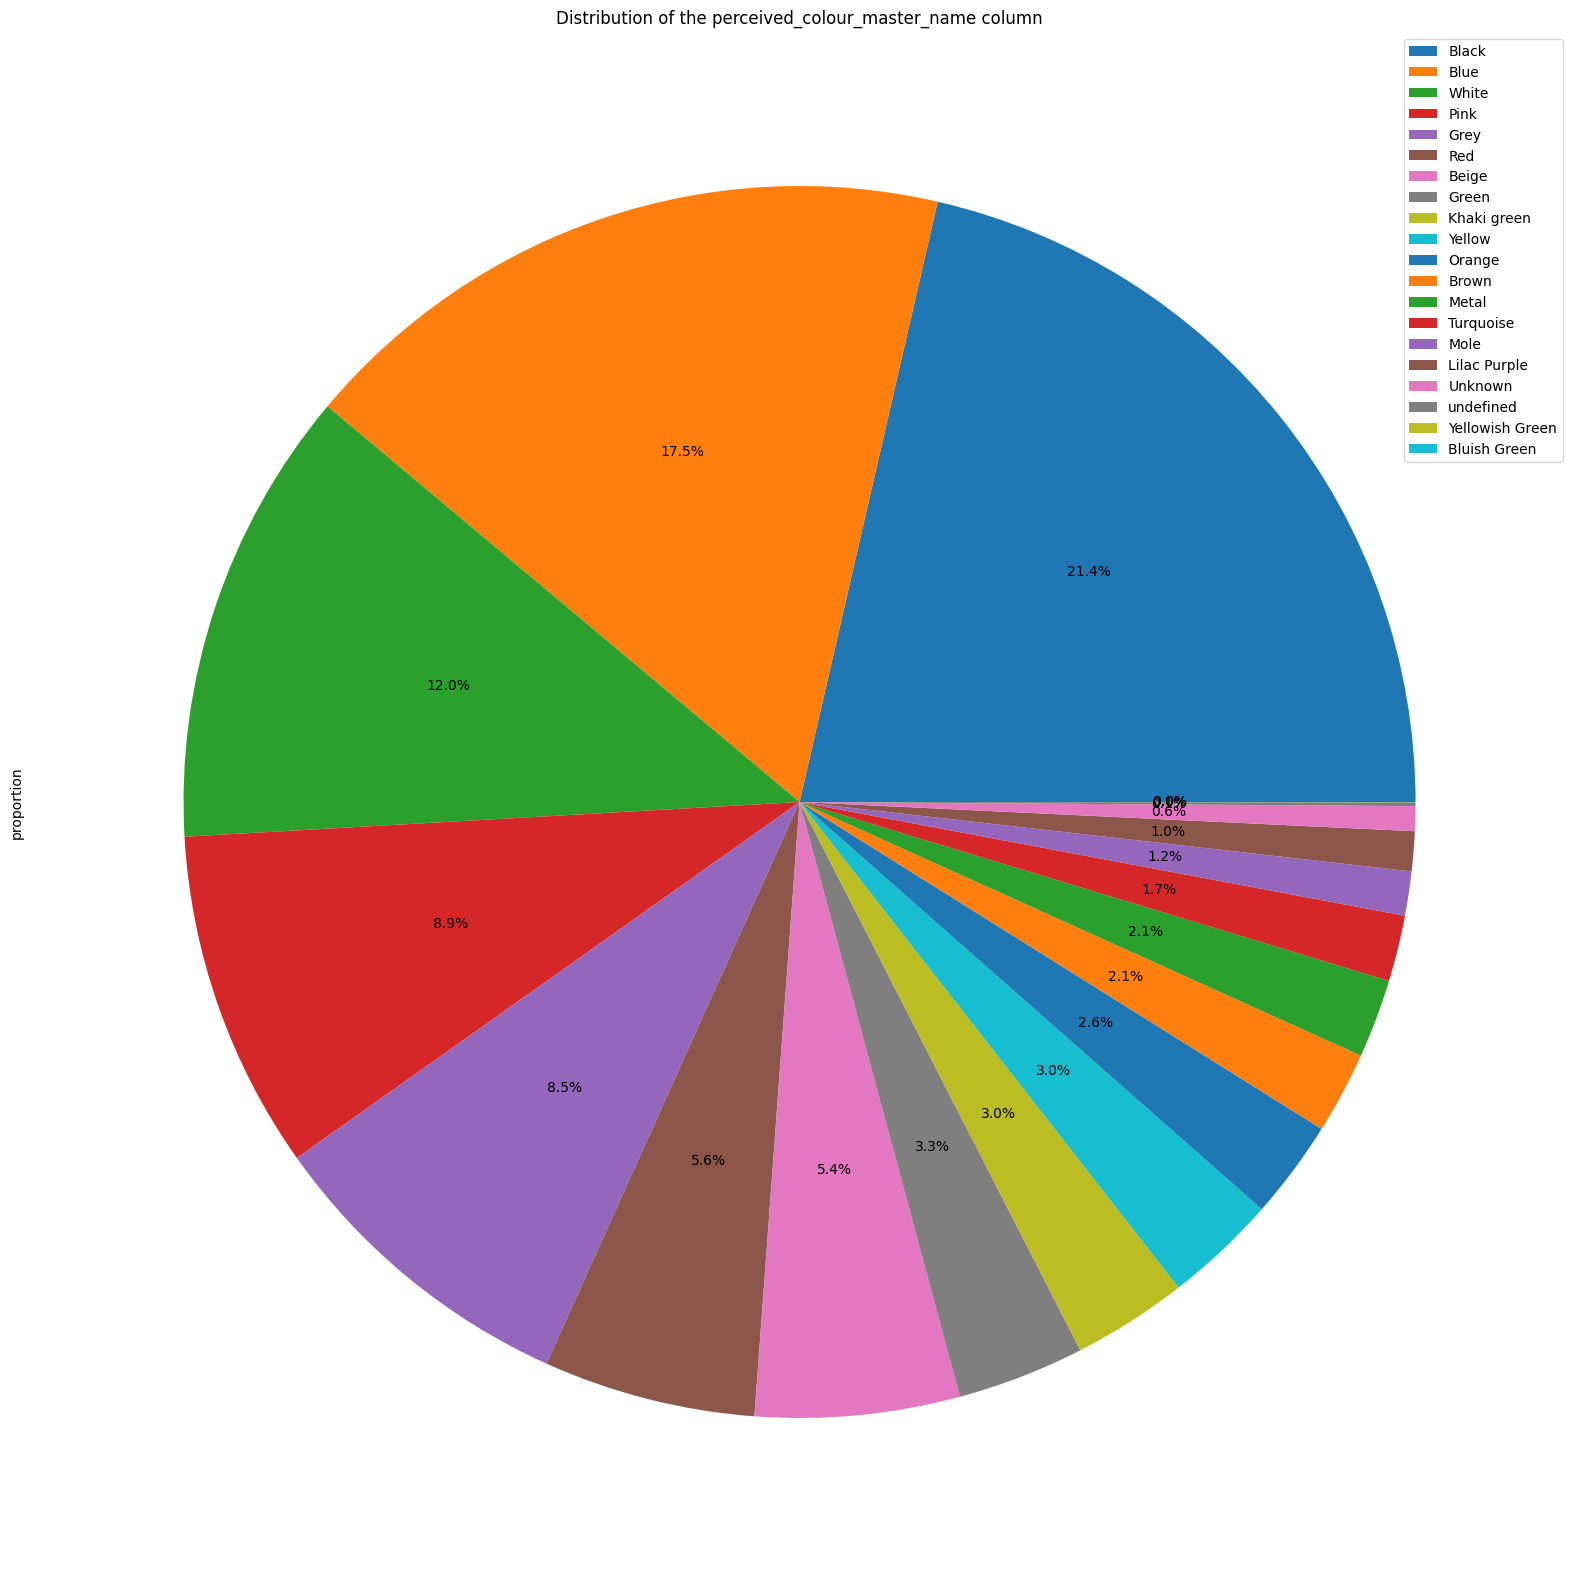

In [13]:
# Number of articles without a colour_master_name
# Number of articles where the perceived_colour_master_name is 'Unknown' without considering capitalization
# Number of articles where the perceived_colour_master_name is 'Undefined' without considering capitalization
num_articles_no_perceived_colour_master_name = len(articles[articles['perceived_colour_master_name'].isnull()])
num_articles_perceived_colour_master_name_unknown = len(articles[articles['perceived_colour_master_name'].str.lower() == 'unknown'])
num_articles_perceived_colour_master_name_undefined = len(articles[articles['perceived_colour_master_name'].str.lower() == 'undefined'])

# print results
print(f'Number of articles without a perceived_colour_master_name: {num_articles_no_colour_group_name}')
print(f'Number of articles where the perceived_colour_master_name is \'Unknown\': {num_articles_perceived_colour_master_name_unknown}')
print(f'Number of articles where the perceived_colour_master_name is \'Undefined\': {num_articles_perceived_colour_master_name_undefined}')


# Plot the distribution of the perceived_colour_master_name column in a pie chart in percentages, a legend and no labels
articles['perceived_colour_master_name'].value_counts(normalize=True).plot(kind='pie', legend=True, labels=None, autopct='%1.1f%%', figsize=(20,20), title='Distribution of the perceived_colour_master_name column', )




In this snippet, we see that each article has a perceived_colour_master_name. However, there are some (=~790) articles where the perceived_colour_master_name is 'Unknown' or 'Undefined'.
In the plot we see that the most common perceived_colour_master_name is 'Black' followed by 'Blue' and 'Grey'.

In [14]:
# Number of articles without a department_name and department_no
num_articles_no_departement_name = len(articles[articles['department_name'].isnull()])
num_articles_no_departement_no = len(articles[articles['department_no'].isnull()])
minimum_departement_no = min(articles['department_no'])
# number of unique department_no and department_name
num_unq_departement_no = len(articles['department_no'].unique())
num_unq_departement_name = len(articles['department_name'].unique())

# print results
print(f'Number of articles without a department_name: {num_articles_no_departement_name}')
print(f'Number of articles without a department_no: {num_articles_no_departement_no}')
print(f'Minimum department_no: {minimum_departement_no}')
print(f'Number of unique department_no: {num_unq_departement_no}')
print(f'Number of unique department_name: {num_unq_departement_name}')

Number of articles without a department_name: 0
Number of articles without a department_no: 0
Minimum department_no: 1201
Number of unique department_no: 299
Number of unique department_name: 250


As we can see, there are no articles without a department_name or department_no. The minimum department_no is 1201.
There are 299 unique department_no and 250 unique department_name, so there is no 1 to 1 relation. As such it is probably better to use department_no as the colunmn of interest (for location).

Number of articles without an index_code: 0
Number of articles without an index_name: 0


<Axes: title={'center': 'Distribution of the index_name column'}, xlabel='index_name'>

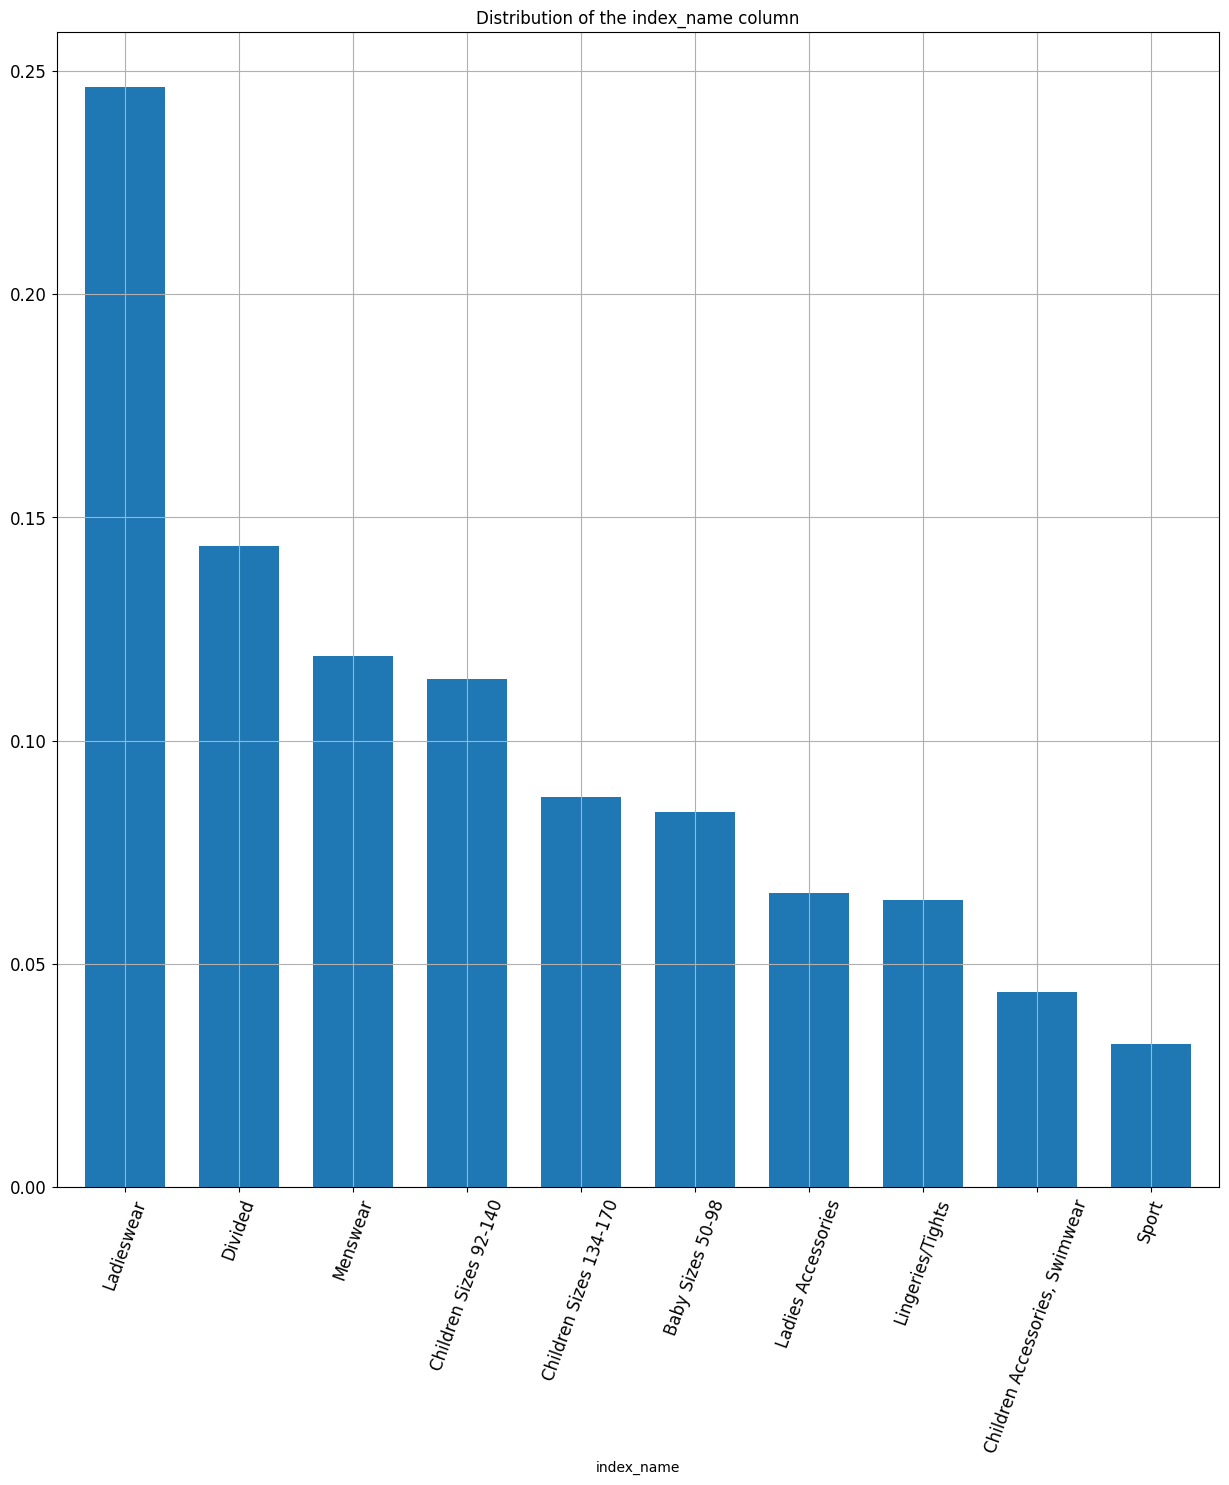

In [15]:
# Number of articles without an index_code and index_name
num_articles_no_index_code = len(articles[articles['index_code'].isnull()])
num_articles_no_index_name = len(articles[articles['index_name'].isnull()])
# print results
print(f'Number of articles without an index_code: {num_articles_no_index_code}')
print(f'Number of articles without an index_name: {num_articles_no_index_name}')
# Plot the distribution of the index_name column in percentages
articles['index_name'].value_counts(normalize=True).plot(kind='bar', figsize=(15,15), title='Distribution of the index_name column', rot = 70, grid = True, width = 0.7, fontsize=12)

In this snippet, we see that each article has an index_name. Nothiing unexpected here.

In [16]:
# Nunber of articles without a detail_desc
num_articles_no_detail_desc = len(articles[articles['detail_desc'].isnull()])
# print results
print(f'Number of articles without a detail_desc: {num_articles_no_detail_desc}')
# Print articles that do not have a description
print(articles[articles['detail_desc'].isnull()])

Number of articles without a detail_desc: 416
       article_id  product_code                   prod_name  product_type_no  \
1467   0351332007        351332        Marshall Lace up Top              252   
2644   0420049002        420049                  OL TAGE PQ               87   
2645   0420049003        420049                  OL TAGE PQ               87   
2742   0426199002        426199  Ellen Shortie Daisy Low 3p              286   
2743   0426199010        426199  Ellen Shortie Daisy Low 3p              286   
...           ...           ...                         ...              ...   
67838  0752458001        752458           Poissy boho dress              265   
72720  0768842001        768842                 Andrews set              270   
72721  0768842004        768842                 Andrews set              270   
93144  0856985001        856985                   Pogo rope               67   
95624  0867200001        867200              Necklace Simon               

We can see that some (~416) articles do not have a description.
## Customers
We will now explore the customers dataset. We will start by exploring the customer_id column.

In [17]:
# number of unique customer ids vs number of customers
num_unq_customer_ids = len(customers['customer_id'].unique())
num_customers = len(customers)
# number of customers that have an id with length not equal to 64 characters
num_customers_not_64 = len(customers[customers['customer_id'].str.len() != 64])

# print results
print(f'Number of unique customer ids: {num_unq_customer_ids} \nNumber of customers: {num_customers}')
print(f'Number of customers that have an id with length not equal to 64 characters: {num_customers_not_64}')



Number of unique customer ids: 1371980 
Number of customers: 1371980
Number of customers that have an id with length not equal to 64 characters: 0


As we can see, the number of unique customer ids is equal to the number of customers. This means that there are no duplicates in the customer_id column and each row has a unique id.


In [18]:
# find the max and min of the FN column, not counting Nan values
max_FN = customers['FN'].max()
min_FN = customers['FN'].min()
# number of Fn values that are Nan
num_FN_Nan = customers['FN'].isnull().sum()
# number of fn values that are not nan
num_FN_not_Nan = len(customers) - num_FN_Nan

# print results
print(f'Maximum FM: {max_FN} \nMinimum FM: {min_FN}')
print(f'Number of FN values that are Nan: {num_FN_Nan}')
print(f'Number of FN values that are not Nan: {num_FN_not_Nan}')


Maximum FM: 1.0 
Minimum FM: 1.0
Number of FN values that are Nan: 895050
Number of FN values that are not Nan: 476930


We can see that about a third of the FN values are Nan. While the other rows have a FN value 1. Other than that it is not clear what the FN column represents.

In [19]:
# Find the max and min of the active column, not counting Nan values
max_active = customers['Active'].max()
min_active = customers['Active'].min()
# number of active values that are Nan
num_active_Nan = customers['Active'].isnull().sum()
# number of active values that are not nan
num_active_not_Nan = len(customers) - num_active_Nan

# print results
print(f'Maximum active: {max_active} \nMinimum active: {min_active}')
print(f'Number of active values that are Nan: {num_active_Nan}')
print(f'Number of active values that are not Nan: {num_active_not_Nan}')


Maximum active: 1.0 
Minimum active: 1.0
Number of active values that are Nan: 907576
Number of active values that are not Nan: 464404


We can see that about a third of the active values are Nan. While the other rows have an active value 1. Other than that it is not clear what the active column represents. We will now look how those two relate to each other.

Number of rows where FN is Nan: 895050
Number of rows where FN is 1: 476930


<Axes: title={'center': 'FN = 1'}, ylabel='proportion'>

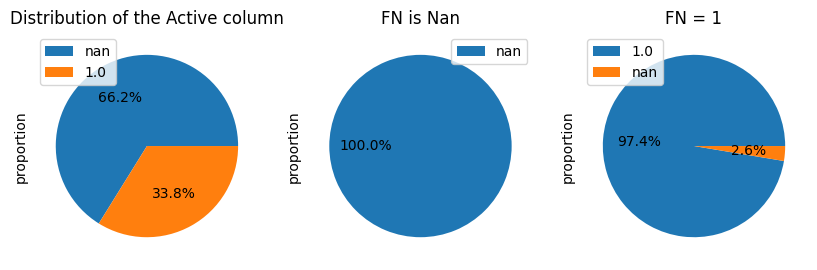

In [20]:
# select the rows where FN is Nan
no_fn = customers[customers['FN'].isnull()]
# select the rows where FN is not Nan
no_fn_1 = customers[customers['FN'] == 1]

# print results
print(f'Number of rows where FN is Nan: {len(no_fn)}')
print(f'Number of rows where FN is 1: {len(no_fn_1)}')
# make a pie chart of the Active column where the number of occurences is counted, also count the Nan values
fig, axes = matplotlib.pyplot.subplots(nrows=1, ncols=3)

customers['Active'].value_counts(normalize=True, dropna=False).plot(kind='pie', legend=True, labels=None, autopct='%1.1f%%', figsize=(10,10), title='Distribution of the Active column', ax=axes[0])
no_fn['Active'].value_counts(normalize=True, dropna=False).plot(kind='pie', legend=True, labels=None, autopct='%1.1f%%', figsize=(10,10), title='FN is Nan', ax=axes[1])
no_fn_1['Active'].value_counts(normalize=True, dropna=False).plot(kind='pie', legend=True, labels=None, autopct='%1.1f%%', figsize=(10,10), title='FN = 1',ax=axes[2])

We can see that every row where FN is Nan, Active is also Nan. On the other side, about 97% of the rows where FN is 1, Active is also 1. They are probably linked in some way. But their use for our project remains to be seen.



Number of rows where the club_member_status is null: 6062
Number of rows where the club_member_status is not null: 1365918


<Axes: title={'center': 'Distribution of the club_member_status column'}, xlabel='club_member_status'>

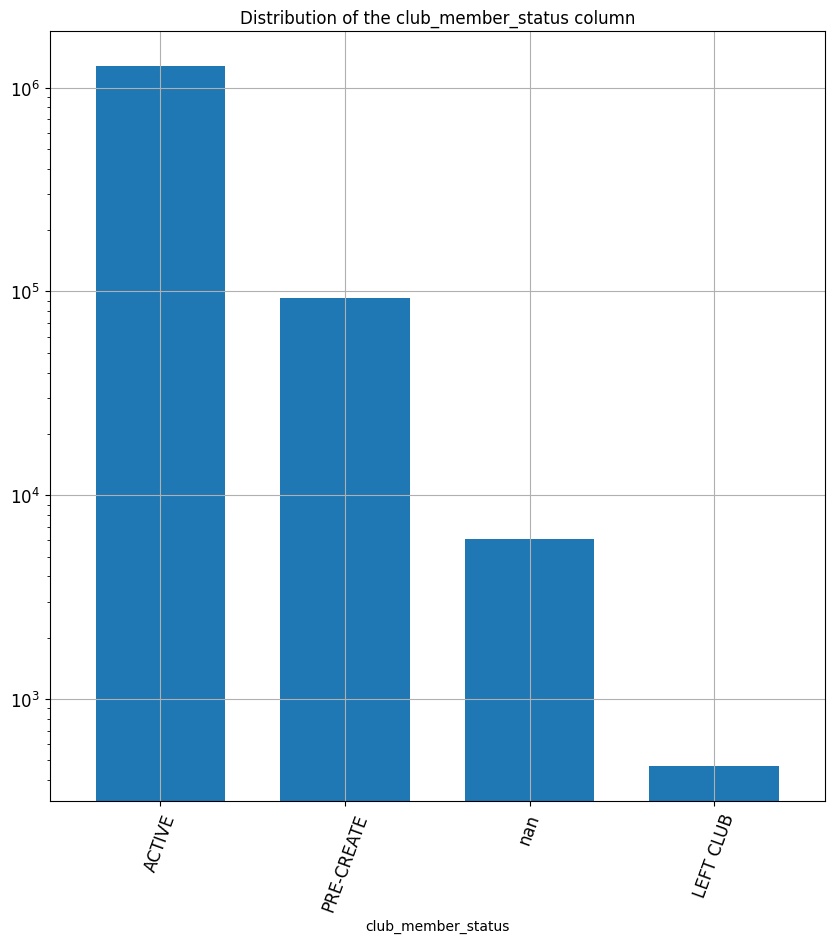

In [21]:
# Number of rows where the club_member_status is null
num_club_member_status_null = len(customers[customers['club_member_status'].isnull()])
# Number of rows where the club_member_status is not null
num_club_member_status_not_null = len(customers) - num_club_member_status_null
# print results
print(f'Number of rows where the club_member_status is null: {num_club_member_status_null}')
print(f'Number of rows where the club_member_status is not null: {num_club_member_status_not_null}')
# Plot the distribution of the club_member_status column, logaritmic scale, including Nan values
customers['club_member_status'].value_counts(dropna=False).plot(kind='bar', figsize=(10,10), title='Distribution of the club_member_status column', rot = 70, grid = True, width = 0.7, fontsize=12, logy=True)

It seems that 6062 rows have a null value for the club_member_status column. But the majority of the customers have either an active member status or are yet to create one. Some customers have left the club.

Number of rows where the age is null: 15861
Minimum age: 16
Maximum age: 99
Average age: 36.386964565794


<Axes: title={'center': 'Distribution of the age column of customers that have bought a black item'}, ylabel='Frequency'>

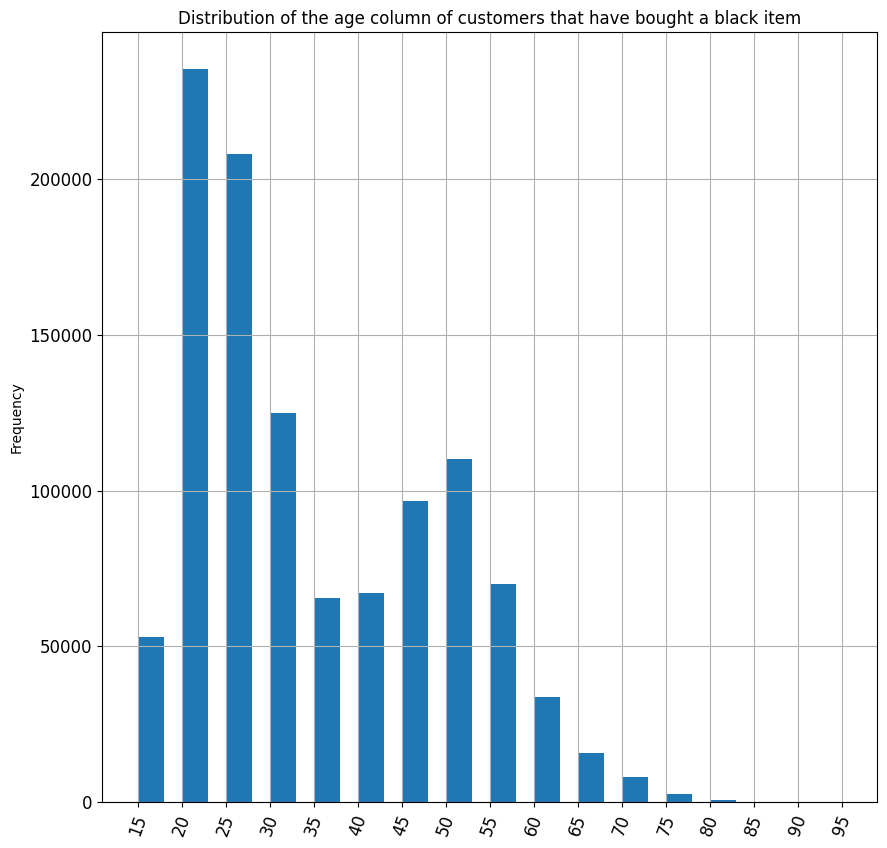

In [9]:
# Number of rows where the age is null
num_age_null = len(customers[customers['age'].isnull()])
# min and max age
min_age = int(customers['age'].min())
max_age = int(customers['age'].max())
# round min_age to the floor 5
min_age_rounded = min_age - (min_age % 5)
# round max_age to the ceiling 5
max_age_rounded = max_age + (5 - max_age % 5)

# average age
avg_age = customers['age'].mean()

# print results
print(f'Number of rows where the age is null: {num_age_null}')
print(f'Minimum age: {min_age}')
print(f'Maximum age: {max_age}')
print(f'Average age: {avg_age}')

# Plot the distribution of the age column, grouping the ages in bins of 5 years, label every 5 years, logaritmic scale
customers['age'].plot(kind='hist', figsize=(10,10), title='Distribution of the age column', rot = 70, grid = True, width = 3, fontsize=12, bins=range(min_age_rounded, max_age_rounded, 5), xticks=range(min_age_rounded, max_age_rounded, 5))



It is noticable that the about 16000 customers have a null value for the age column. Other than that there are no outliers in the age column.

Number of customers where the fashion_news_frequency is null: 16011


<Axes: title={'center': 'Distribution of the fashion_news_frequency column'}, xlabel='fashion_news_frequency'>

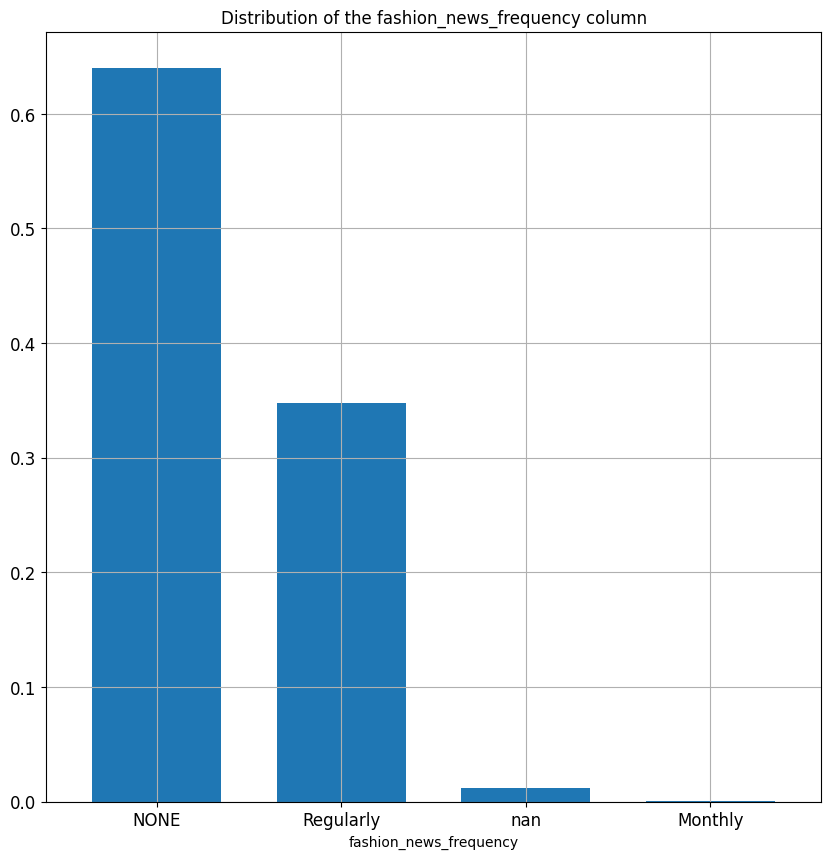

In [23]:
# number of customers where the fashion_news_frequency is null
num_fashion_news_frequency_null = len(customers[customers['fashion_news_frequency'].isnull()])

# print results
print(f'Number of customers where the fashion_news_frequency is null: {num_fashion_news_frequency_null}')
# Plot the distribution of the fashion_news_frequency column, including Nan values
customers['fashion_news_frequency'].value_counts(dropna=False, normalize=True).plot(kind='bar', figsize=(10,10), title='Distribution of the fashion_news_frequency column', rot = 0, grid = True, width = 0.7, fontsize=12)

Number of customers where the fashion_news_frequency is 'NONE': 877711
Number of customers where the fashion_news_frequency is 'Regularly' or 'Monthly': 478258


<Axes: title={'center': "'Regularly' or 'Monthly' news"}, xlabel='Active'>

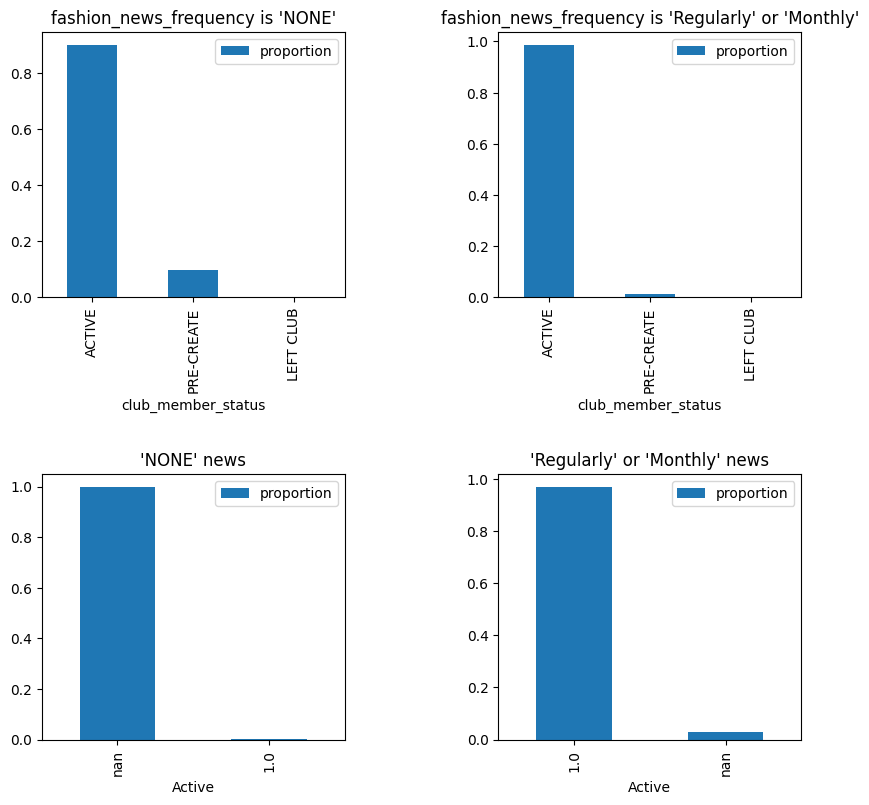

In [24]:
# Look at the relation between fashion_news_frequency and club_member_status
# select the rows where the fashion_news_frequency is 'NONE'
fashion_news_frequency_null = customers[customers['fashion_news_frequency'] == str('NONE')]
# select the rows where the fashion_news_frequency is either Regularly or Monthly
the_rest = customers[(customers['fashion_news_frequency'] == str('Regularly')) | (customers['fashion_news_frequency'] == str('Monthly'))]
# print the customers who active 1 but have a fashion_news_frequency of 'NONE'
# print results
print(f'Number of customers where the fashion_news_frequency is \'NONE\': {len(fashion_news_frequency_null)}')
print(f'Number of customers where the fashion_news_frequency is \'Regularly\' or \'Monthly\': {len(the_rest)}')
# Plot a bar chart of the membership_status column for both the customers who have a fashion_news_frequency of 'NONE' and the customers who have a fashion_news_frequency of 'Regularly' or 'Monthly'
fig, axes = matplotlib.pyplot.subplots(nrows=2, ncols=2)
fig.tight_layout(pad=4.0)
fashion_news_frequency_null['club_member_status'].value_counts(normalize=True).plot(kind='bar', legend=True, figsize=(10,10), title='fashion_news_frequency is \'NONE\'', ax=axes[0,0])
the_rest['club_member_status'].value_counts(normalize=True).plot(kind='bar', legend=True, figsize=(10,10), title='fashion_news_frequency is \'Regularly\' or \'Monthly\'', ax=axes[0,1])
fashion_news_frequency_null['Active'].value_counts(normalize=True, dropna=False).plot(kind='bar', legend=True, figsize=(10,10), title='\'NONE\' news', ax=axes[1,0])
the_rest['Active'].value_counts(normalize=True, dropna=False).plot(kind='bar', legend=True, figsize=(10,10), title='\'Regularly\' or \'Monthly\' news', ax=axes[1,1])



The first two graphs do not really give us any information. However, the last two graphs show that the customers who have a fashion_news_frequency of 'NONE' are more likely to be inactive than the customers who have a fashion_news_frequency of 'Regularly' or 'Monthly'.

In [25]:
# number of customers that do not have a postal_code
num_postal_code_null = len(customers[customers['postal_code'].isnull()])
# number of customers that have a postal_code with length not equal to 64
num_postal_code_not_64 = len(customers[customers['postal_code'].str.len() != 64])

# print results
print(f'Number of customers that do not have a postal_code: {num_postal_code_null}')
print(f'Number of customers that have a postal_code with length not equal to 64: {num_postal_code_not_64}')

Number of customers that do not have a postal_code: 0
Number of customers that have a postal_code with length not equal to 64: 0


Here we can see that each customer has a postal_code of length 64.

In [26]:
# number of transactions without a t_dat (date of transaction)
num_t_dat_null = len(transactions_train[transactions_train['t_dat'].isnull()])
# earliest transaction date
earliest_t_dat = transactions_train['t_dat'].min()
# latest transaction date
latest_t_dat = transactions_train['t_dat'].max()
# number of transactions where t_dat is not in the 'yyyy-mm-dd' format using regex
no_bad_format = transactions_train[transactions_train['t_dat'].str.contains(r'^\d{4}-\d{2}-\d{2}$') == False]
# print results
print(f'Number of transactions without a t_dat: {num_t_dat_null}')
print(f'Earliest transaction date: {earliest_t_dat}')
print(f'Latest transaction date: {latest_t_dat}')
print(f'Number of transactions where t_dat is not in the \'yyyy-mm-dd\' format: {len(no_bad_format)}')

Number of transactions without a t_dat: 0
Earliest transaction date: 2018-09-20
Latest transaction date: 2020-09-22
Number of transactions where t_dat is not in the 'yyyy-mm-dd' format: 0


Here we see that every transaction has a date, the earliest and latest date do not raise any suspision and the date format is correct for every transaction.

In [27]:
# number of transactions without a customer_id
num_customer_id_null = len(transactions_train[transactions_train['customer_id'].isnull()])
# number of transactions where the customer_id is not of length 64
num_customer_id_not_64 = len(transactions_train[transactions_train['customer_id'].str.len() != 64])
# number of transactions where the customer_id is not in the customers dataset
num_customer_id_not_in_customers = len(transactions_train[transactions_train['customer_id'].isin(customers['customer_id']) == False])
# print results
print(f'Number of transactions without a customer_id: {num_customer_id_null}')
print(f'Number of transactions where the customer_id is not of length 64: {num_customer_id_not_64}')
print(f'Number of transactions where the customer_id is not in the customers dataset: {num_customer_id_not_in_customers}')

Number of transactions without a customer_id: 0
Number of transactions where the customer_id is not of length 64: 0
Number of transactions where the customer_id is not in the customers dataset: 0


Here we see that every transaction has a customer_id of length 64 and that every customer_id is in the customers dataset.

In [28]:
# number of transactions without an article_id
num_article_id_null = len(transactions_train[transactions_train['article_id'].isnull()])
# number of transactions where the article_id is not of length 10
num_article_id_not_10 = len(transactions_train[transactions_train['article_id'].str.len() != 10])
# number of transactions where the article_id is not in the articles dataset
num_article_id_not_in_articles = len(transactions_train[transactions_train['article_id'].isin(articles['article_id']) == False])
# print results
print(f'Number of transactions without an article_id: {num_article_id_null}')
print(f'Number of transactions where the article_id is not of length 10: {num_article_id_not_10}')
print(f'Number of transactions where the article_id is not in the articles dataset: {num_article_id_not_in_articles}')

Number of transactions without an article_id: 0
Number of transactions where the article_id is not of length 10: 0
Number of transactions where the article_id is not in the articles dataset: 0


Here we see that every transaction has an article_id of length 10 and that every article_id is in the articles dataset.

In [29]:
# number of transactions without a price
num_price_null = len(transactions_train[transactions_train['price'].isnull()])
# minimum price of a transaction
min_price = transactions_train['price'].min()
# maximum price of a transaction
max_price = transactions_train['price'].max()
# print results
print(f'Number of transactions without a price: {num_price_null}')
print(f'Minimum price of a transaction: {min_price}')
print(f'Maximum price of a transaction: {max_price}')


Number of transactions without a price: 0
Minimum price of a transaction: 1.694915254237288e-05
Maximum price of a transaction: 0.5915254237288136


Here we see that every transaction has a positive price.